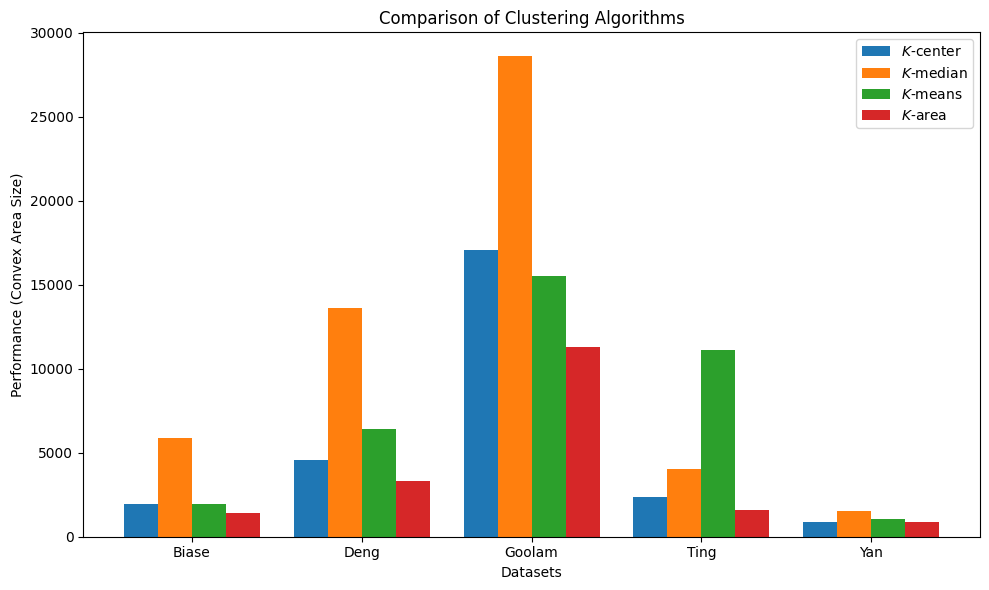

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ['Biase', 'Deng', 'Goolam', 'Ting', 'Yan']
k_center = [1946.17, 4557.64, 17083.75, 2376.34, 857.88]
k_median = [5872.96, 13640.09, 28588.06, 4016.70, 1516.40]
k_means = [1946.21, 6390.81, 15519.73, 11114.86, 1053.21]
k_area = [1390.24, 3287.94, 11270.07, 1588.39, 864.69]  # 'NaN' for missing data

# Create a bar chart
bar_width = 0.2
index = np.arange(len(datasets))

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each algorithm
bar1 = ax.bar(index - 1.5 * bar_width, k_center, bar_width, label='$K$-center')
bar2 = ax.bar(index - 0.5 * bar_width, k_median, bar_width, label='$K$-median')
bar3 = ax.bar(index + 0.5 * bar_width, k_means, bar_width, label='$K$-means')
bar4 = ax.bar(index + 1.5 * bar_width, k_area, bar_width, label='$K$-area')

# Labeling the chart
ax.set_xlabel('Datasets')
ax.set_ylabel('Performance (Convex Area Size)')
ax.set_title('Comparison of Clustering Algorithms')
ax.set_xticks(index)
ax.set_xticklabels(datasets)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

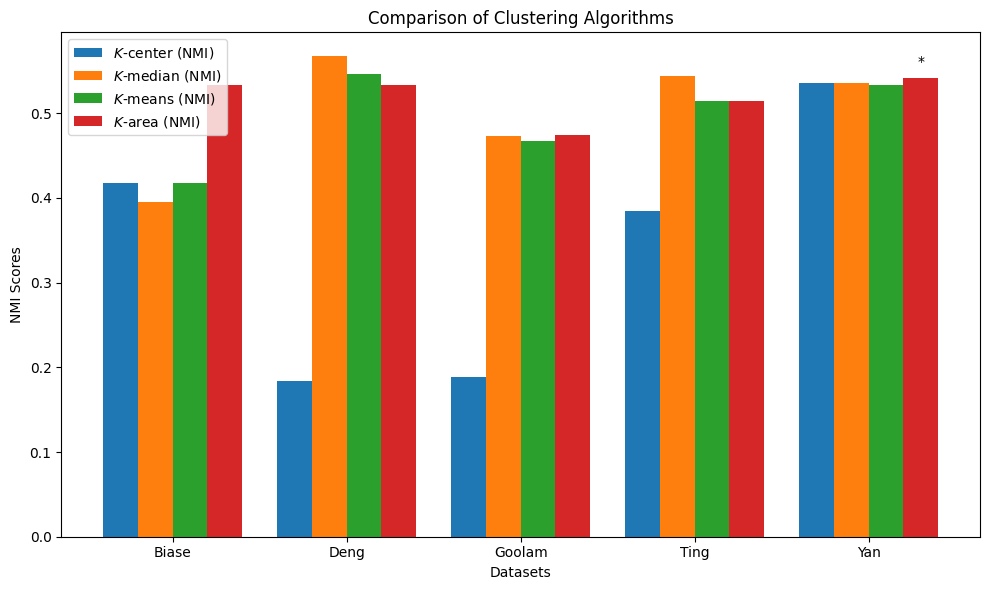

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for the table
datasets = ["Biase", "Deng", "Goolam", "Ting", "Yan"]
k_center_nmi = [0.417, 0.184, 0.188, 0.384, 0.535]
k_median_nmi = [0.395, 0.567, 0.473, 0.544, 0.536]
k_means_nmi = [0.417, 0.546, 0.467, 0.514, 0.533]
k_area_nmi = [0.533, 0.533, 0.474, 0.514, 0.542]  # None for missing data


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width for grouped bars
bar_width = 0.2
index = np.arange(len(datasets))

# Plotting NMI bars for each algorithm
bar1 = ax.bar(index - 1.5 * bar_width, k_center_nmi, bar_width, label='$K$-center (NMI)', color='tab:blue')
bar2 = ax.bar(index - 0.5 * bar_width, k_median_nmi, bar_width, label='$K$-median (NMI)', color='tab:orange')
bar3 = ax.bar(index + 0.5 * bar_width, k_means_nmi, bar_width, label='$K$-means (NMI)', color='tab:green')

# Replace None values with 0 for plotting
k_area_nmi_plot = [0 if x is None else x for x in k_area_nmi]
bar4 = ax.bar(index + 1.5 * bar_width, k_area_nmi_plot, bar_width, label='$K$-area (NMI)', color='tab:red')

# Annotate the best results (denoted by *)
for i, dataset in enumerate(datasets):
    # Filter out None values before finding the maximum
    valid_k_area_nmi = [x for x in k_area_nmi if x is not None]
    if k_area_nmi[i] is not None and k_area_nmi[i] == max(valid_k_area_nmi, default=None):  # Handle empty list
        ax.text(i + 1.5 * bar_width, k_area_nmi[i] + 0.01, '*', ha='center', va='bottom', color='black')

# Labeling the chart
ax.set_xlabel('Datasets')
ax.set_ylabel('NMI Scores')
ax.set_title('Comparison of Clustering Algorithms')
ax.set_xticks(index)
ax.set_xticklabels(datasets)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


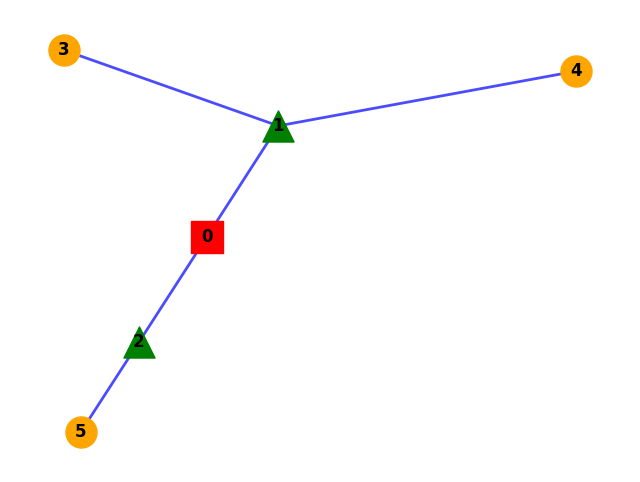

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a simple tree graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Define a custom function to draw the tree
def draw_tree_with_shapes(G):
    pos = nx.spring_layout(G)  # Layout for positioning nodes (you can also use nx.graphviz_layout for a more tree-like structure)

    # Create a figure
    plt.figure(figsize=(8, 6))

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="blue")

    # Draw nodes with different shapes based on some condition (e.g., depth of the node)
    for node in G.nodes():
        if node == 0:
            # Draw the root node (0) as a square
            plt.scatter(*pos[node], s=500, c="red", marker="s")  # s is the size of the node
        elif node in [1, 2]:
            # Draw level 1 nodes as triangles
            plt.scatter(*pos[node], s=500, c="green", marker="^")
        else:
            # Draw other nodes as circles
            plt.scatter(*pos[node], s=500, c="orange", marker="o")

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black", font_weight="bold")

    # Show the plot
    plt.axis('off')
    plt.show()

# Draw the tree with custom vertex shapes
draw_tree_with_shapes(G)

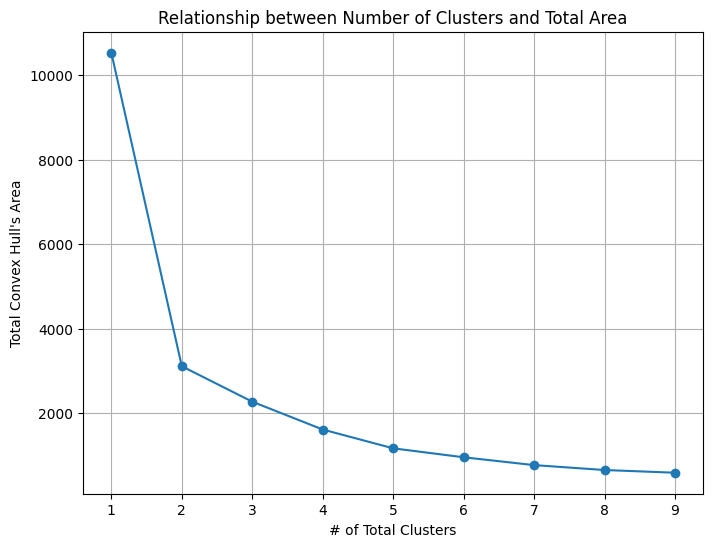

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
num_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]
total_area = [10530.41, 3110.62, 2271.75, 1613.22, 1167.92, 956.11, 770.70, 654.54, 590.55]

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(num_clusters, total_area, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("# of Total Clusters")
plt.ylabel("Total Convex Hull's Area")
plt.title("Relationship between Number of Clusters and Total Area")
plt.grid(True)

# Show the plot
plt.show()

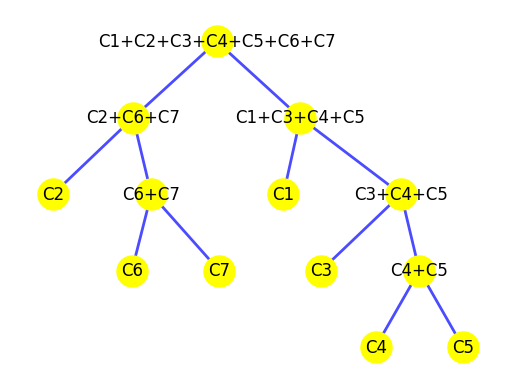

Tree Data Structure:
{0: [], 'C1+C2+C3+C4+C5+C6+C7': ['C2+C6+C7', 'C1+C3+C4+C5', 'C2+C6+C7', 'C1+C3+C4+C5'], 'C2': ['C2+C6+C7'], 'C2+C6+C7': ['C6+C7', 'C2', 'C6+C7'], 'C1': ['C1+C3+C4+C5'], 'C1+C3+C4+C5': ['C3+C4+C5', 'C1', 'C3+C4+C5'], 'C6': ['C6+C7'], 'C6+C7': ['C7', 'C6', 'C7'], 'C3': ['C3+C4+C5'], 'C3+C4+C5': ['C4+C5', 'C3', 'C4+C5'], 'C4': ['C4+C5'], 'C4+C5': ['C5', 'C4', 'C5']}


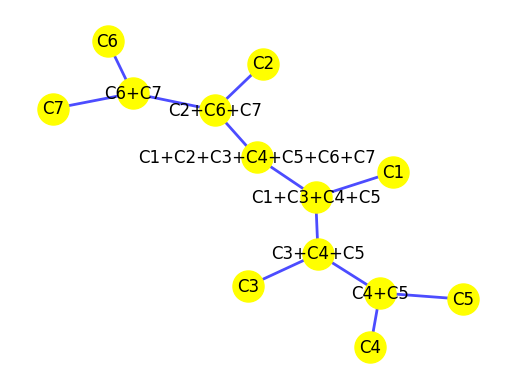

In [ ]:
!pip install networkx
!pip install matplotlib
!pip install graphviz
!pip install pydot

import networkx as nx
import matplotlib.pyplot as plt

# Create a simple tree graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6),
                  (4, 7), (4, 8), (6, 9), (6, 10), (10, 11), (10, 12)])

G = nx.relabel_nodes(G, {0: "C1+C2+C3+C4+C5+C6+C7"}, copy=True)
G = nx.relabel_nodes(G, {1: "C2+C6+C7"}, copy=True)
G = nx.relabel_nodes(G, {2: "C1+C3+C4+C5"}, copy=True)
G = nx.relabel_nodes(G, {3: "C2"}, copy=True)
G = nx.relabel_nodes(G, {4: "C6+C7"}, copy=True)
G = nx.relabel_nodes(G, {5: "C1"}, copy=True)
G = nx.relabel_nodes(G, {6: "C3+C4+C5"}, copy=True)
G = nx.relabel_nodes(G, {7: "C6"}, copy=True)
G = nx.relabel_nodes(G, {8: "C7"}, copy=True)
G = nx.relabel_nodes(G, {9: "C3"}, copy=True)
G = nx.relabel_nodes(G, {10: "C4+C5"}, copy=True)
G = nx.relabel_nodes(G, {11: "C4"}, copy=True)
G = nx.relabel_nodes(G, {12: "C5"}, copy=True)

# Function to get the level of a node in the tree
def get_node_level(tree, node, root_node):
    level = 0
    queue = [(root_node, level)]  # Start with the root node at level 0
    visited = {root_node}

    while queue:
        current_node, current_level = queue.pop(0)

        if current_node == node:
            return current_level

        for child in tree.get(current_node, []):
            if child not in visited:
                queue.append((child, current_level + 1))
                visited.add(child)

    return -1  # Node not found in the tree


# Build the tree data structure as a dictionary
# Build the tree data structure as a dictionary
def build_tree(G, root_node):
    tree = {root_node: []}  # Initialize the tree with the root node

    # Traverse the graph to build the tree structure
    for node in G.nodes():
        if node != root_node:  # Skip the root node
            for neighbor in G.neighbors(node):
                if neighbor in tree:  # If neighbor is a parent, add node as a child
                    tree.setdefault(neighbor, []).append(node)
                elif node in tree:  # If node is a parent, add neighbor as a child
                    tree.setdefault(node, []).append(neighbor)
                else:  # If both are new, add to tree
                    # Convert nodes to strings for comparison if necessary:
                    parent = min(str(node), str(neighbor))
                    child = max(str(node), str(neighbor))
                    tree.setdefault(parent, []).append(child)

    return tree


# Define a function to draw the tree with custom node shapes and colors
def draw_tree_with_shapes(G, tree, root_node):
    # Use nx.kamada_kawai_layout for a more stable and deterministic layout:
    pos = nx.kamada_kawai_layout(G)  # Layout for node positioning


    # Define node shapes FIRST (before the loop)
    node_shapes = {
        0: 's',  # Square for root
        1: '^',  # Triangle for level 1
        2: '^',  # Triangle for level 1
        3: 'o',  # Circle for others
        4: 'o',  # Circle for others
        5: 'o',   # Circle for others
        6: 'o',  # Circle for others
        7: 'o',  # Circle for others
        8: 'o',  # Circle for others
        9: 'o',  # Circle for others
        10: 'o',  # Circle for others
        11: 'o',  # Circle for others
        12: 'o'   # Circle for others
    }

    # Define node colors based on level
    node_colors_dict = {}  # Use a dictionary to store node colors
    node_shapes_list = [] # Use a list to store node shapes
    for i, node in enumerate(G.nodes()): # i: int index, node: actual node label
        # Assign yellow color to all nodes
        node_colors_dict[node] = 'yellow'

        level = get_node_level(tree, node, root_node)  # Get level for the node

        # Assign colors based on level (you can customize these)
        if level == 0:
            node_colors_dict[node] = 'red'  # Root node
        elif level == 1:
            node_colors_dict[node] = 'green'  # Level 1 nodes
        elif level == 2:
            node_colors_dict[node] = 'blue'  # Level 2 nodes
        elif level == 3:
            node_colors_dict[node] = 'orange'  # Level 3 nodes
        else:
            node_colors_dict[node] = 'yellow'  # Other levels

        # Add the shape for the current node to the list
        node_shapes_list.append(node_shapes.get(node, 'o')) #node is a string

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="blue")

    # Draw nodes with custom shapes and colors
    # node_size controls the size of the figures
    # Pass the node_shapes_list to node_shape
    for i, node in enumerate(G.nodes()): # i: int index, node: actual node label
        shape = node_shapes.get(node, 'o')  # Get shape for the current node. node is a string
        #print(f"Node: {node}, Shape: {shape}, Color: {node_colors_dict.get(node, 'gray')}") #troubleshooting
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape=shape,
                               node_color=node_colors_dict.get(node, 'gray'), node_size=500) # access color by node (string)

    # Add labels (optional)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

    plt.axis('off')  # Turn off axis
    plt.show()

# Define a function to draw the tree with hierarchical layout
def draw_tree_textbook_style(G, tree, root_node):
    # Use dot layout for hierarchical structure
    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

    # Define node shapes
    node_shapes = {
        0: 's',  # Square for root
        1: '^',  # Triangle for level 1
        2: '^',  # Triangle for level 1
        3: 'o',  # Circle for others
        4: 'o',  # Circle for others
        5: 'o',  # Circle for others
        6: 'o',  # Circle for others
        7: 'o',  # Circle for others
        8: 'o',  # Circle for others
        9: 'o',  # Circle for others
        10: 'o',  # Circle for others
        11: 'o',  # Circle for others
        12: 'o'  # Circle for others
    }

    # Define node colors based on level
    # Change node_colors to a dictionary instead of a list
    node_colors = {}
    for i, node in enumerate(G.nodes()):  # Enumerate to get index
        level = get_node_level(tree, node, root_node)
        if level == 0:
            node_colors[node] = 'red'  # Root node
        elif level == 1:
            node_colors[node] = 'green'  # Level 1 nodes
        elif level == 2:
            node_colors[node] = 'blue'  # Level 2 nodes
        elif level == 3:
            node_colors[node] = 'orange'  # Level 3 nodes
        else:
            node_colors[node] = 'yellow'  # Other levels

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="blue")

    # Draw nodes with custom shapes and colors
    # node_size controls the size of the figures
    for node in G.nodes():
        shape = node_shapes.get(node, 'o')
        # Use node_colors instead of node_colors_dict
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape=shape,
                               node_color=node_colors.get(node, 'yellow'), node_size=500)

    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

    plt.axis('off')  # Turn off axis
    plt.show()

# Build the tree with 0 as the root
tree_data_structure = build_tree(G, 0)

# Draw the tree in textbook style
draw_tree_textbook_style(G, tree_data_structure, 0)

# Build the tree with 0 as the root
tree_data_structure = build_tree(G, 0)

# Print the tree data structure
print("Tree Data Structure:")
print(tree_data_structure)

# Draw the tree
draw_tree_with_shapes(G, tree_data_structure, 0) # Pass the tree and root node

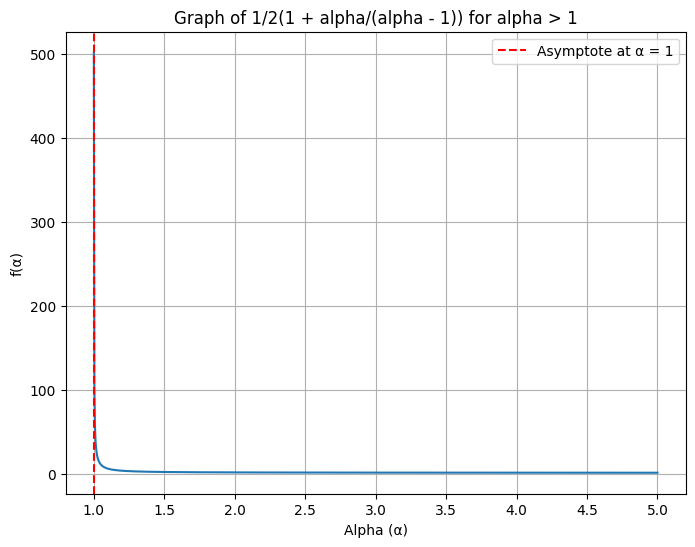

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(alpha):
  return 0.5 * (1 + alpha / (alpha - 1))

# Generate x values (alpha) for alpha > 1
alpha_values = np.linspace(1.001, 5, 1000)  # Start from 1.001 to avoid division by zero

# Calculate y values
y_values = f(alpha_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, y_values)

# Customize the plot
plt.xlabel("Alpha (α)")
plt.ylabel("f(α)")
plt.title("Graph of 1/2(1 + alpha/(alpha - 1)) for alpha > 1")
plt.grid(True)

# Add a vertical asymptote at alpha = 1 (optional, for context)
plt.axvline(x=1, color='red', linestyle='--', label='Asymptote at α = 1')

# Add a legend
plt.legend()

# Show the plot
plt.show()